In [1]:
from nilearn import image, plotting, maskers
from nilearn.interfaces import bids

fsl_mask = "/usr/local/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz"
fsl_bg = "/usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz"

masker = maskers.NiftiMasker(
    mask_img=fsl_mask,
    smoothing_fwhm=4.5,  # FWHM gaussian kernel (3mm*1.5)
    reports=False,
    mask_strategy="whole-brain-template",
    memory="~/nilearn_cache",
)

cbf_filters = dict(
    main_path="/Volumes/projects/181814/derivatives/aslprep",
    modality_folder="perf",
    file_type="nii.gz",
)

# run 1 is SLR, run 2 is neutral, run 3 is SLR, run 4 is neutral

cbf_imgs = bids.get_bids_files(
    sub_label="*",
    file_tag="cbf",
    filters=[("ses", "mri1"), ("run", "1"), ("desc", "scrub")],
    **cbf_filters
)

cbf_array = masker.fit_transform(cbf_imgs)

cbf_array.shape

(92, 228483)

/Users/zeidanlab/miniconda3/envs/med-chronic-pain/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



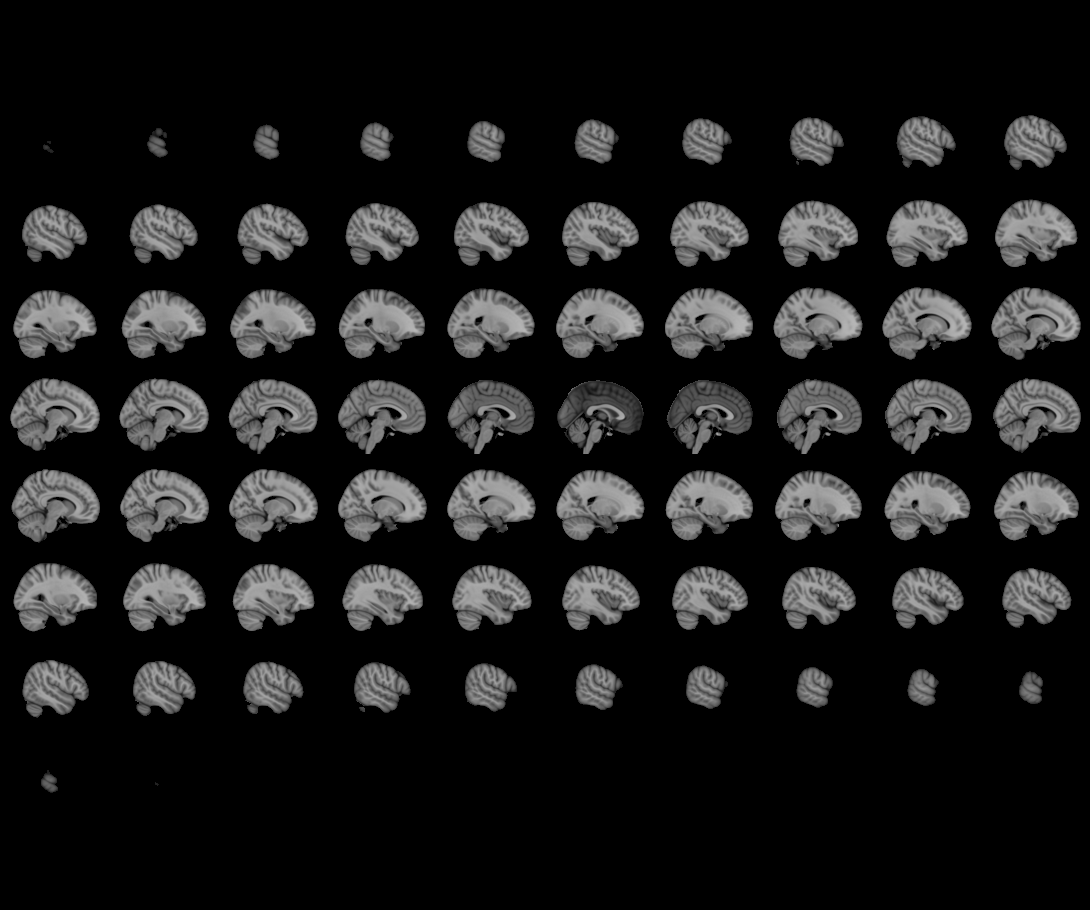
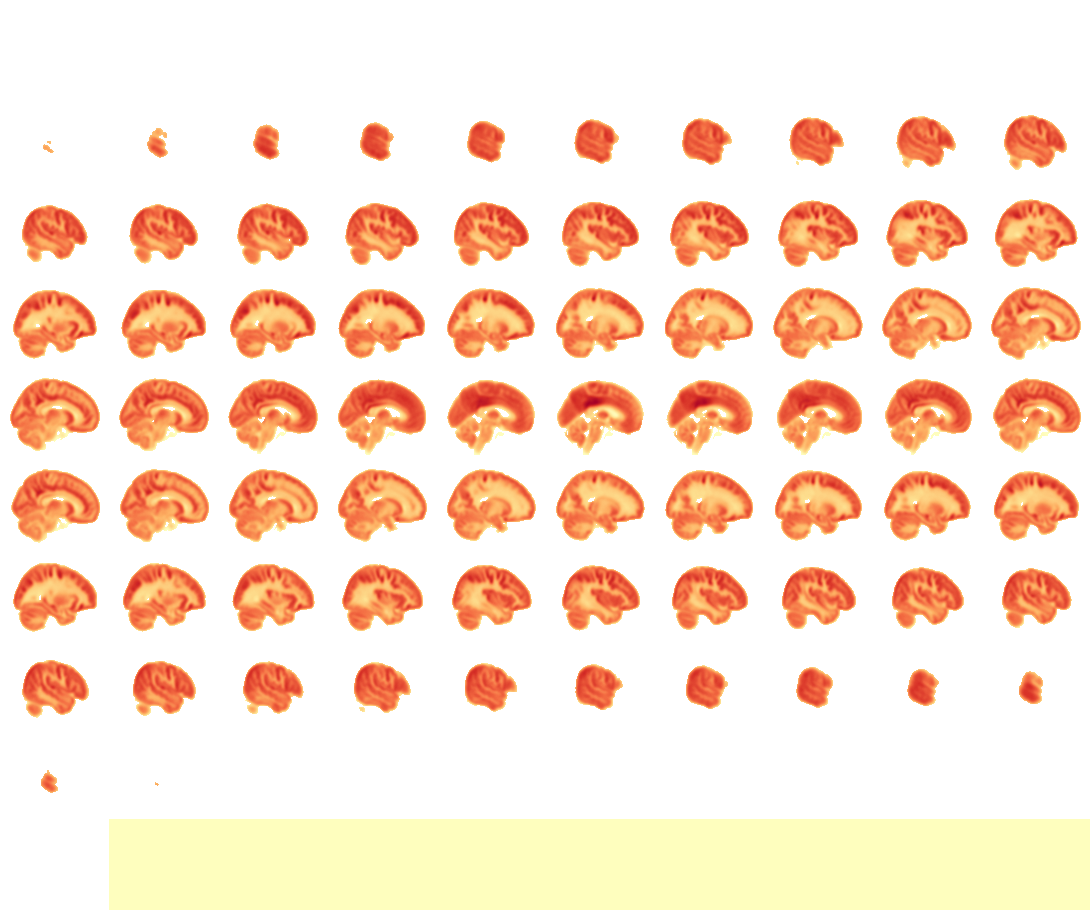

In [2]:
cbf_mean = masker.inverse_transform(cbf_array.mean(axis=0))
plotting.view_img(cbf_mean, bg_img=fsl_bg, cmap="RdYlBu_r")
# added our own background map